In [66]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from itertools import combinations
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import spacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
def clean_data(dataframe, ticker):
    clean_data = []
    for j in range(0, len(dataframe)):
        # Accessing each row using iloc and loop j
        all_row = dataframe.iloc[j]

        # Removing URLs
        #clean_text = re.sub(r"http\S+|www\S+|https\S+", "", str(all_row["text"]))

        clean_text = re.sub(r'http\S+', '', str(all_row["text"]), flags=re.MULTILINE)

        # Removing special characters
        clean_text = re.sub(r"[^a-zA-Z0-9 \n\.]", " ", clean_text)

        # Removing single character with space
        clean_text = re.sub(r"\s+[a-zA-Z]\s+", " ", clean_text)

        # Removing single characters from the start
        clean_text = re.sub(r"\^[a-zA-Z]\s+", " ", clean_text)

        # Removing unncessary spaces
        clean_text = re.sub(r"\s+", " ", clean_text)

        # Removing unnecessary punctuations
        clean_text = re.sub(r"[^\w\s]", "", clean_text)

         # Remove tickers as stop words
        tickers = [ticker]  # Add more tickers if needed
        clean_text = ' '.join(word for word in clean_text.split() if word not in tickers)

        # lowering the case of the text
        clean_text = clean_text.lower()


        #Tokenize
        token = word_tokenize(clean_text)
    
        #Stop word removal
        stop_word = set(stopwords.words("english"))
    
        filtered = [word for word in token if word.lower() not in stop_word]
    
        #joining the tokens
        cleaned_text =" ".join(filtered)

        # Append a dictionary to the list for each row
        clean_data.append(
            {
                "created_at": all_row["created_at"],
                "text": cleaned_text
            }
        )

    # Convert the clean_data list of dictionaries to a new DataFrame
    clean_data_df = pd.DataFrame(clean_data)
    clean_data_df.drop_duplicates(subset="text", inplace=True)

    # Display the cleaned DataFrame
    return clean_data_df

## Importing the Data
**Data Source: https://github.com/yumoxu/stocknet-dataset/blob/master/README.md**

In [37]:
path = r"C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\ML-2\\Project\\Classification- Tweets Data\\raw\\BA"

files = os.listdir(path)
json = [i for i in files if os.path.splitext(i)[1]=="" or os.path.splitext(i)[1].lower() ==".json"]

data = pd.DataFrame() # empty Dataframe

#Concatenating all the data
for i in json:
    file_path = os.path.join(path, i)
    all_data = pd.read_json(file_path, lines = True)
    data = pd.concat([data, all_data], ignore_index=True)

In [38]:
data.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,possibly_sensitive,filter_level,lang,retweeted_status,extended_entities,timestamp_ms,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2014-01-02 02:02:16+00:00,418562858574561280,418562858574561280,ARROM&amp;¨%#@$BA http://t.co/2Osw4Xl9GF,web,False,NaN,NaN,NaN,NaN,...,0.0,medium,en,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,2014-01-03 11:14:04+00:00,419064111431811072,419064111431811072,$BA Jan. 3 Premarket Briefing: 10 Things You S...,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...",False,NaN,NaN,NaN,NaN,...,0.0,medium,en,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,2014-01-04 16:14:34+00:00,419502122602741761,419502122602741760,$BA Boeing Workers Approve Contract Tied to 77...,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...",False,NaN,NaN,NaN,NaN,...,0.0,medium,en,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,2014-01-04 09:34:09+00:00,419401354461724672,419401354461724672,$BA Boeing machinists approve contract tied to...,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...",False,NaN,NaN,NaN,NaN,...,0.0,medium,en,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,2014-01-04 23:15:19+00:00,419608007828193280,419608007828193280,$BA Boeing contract with machinists - details ...,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...",False,NaN,NaN,NaN,NaN,...,0.0,medium,en,NaN,NaN,NaT,NaN,NaN,NaN,NaN


## Very Simple Data Check

In [39]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 1104 non-null   datetime64[ns, UTC]
 1   id                         1104 non-null   int64              
 2   id_str                     1104 non-null   int64              
 3   text                       1104 non-null   object             
 4   source                     1104 non-null   object             
 5   truncated                  1104 non-null   bool               
 6   in_reply_to_status_id      14 non-null     float64            
 7   in_reply_to_status_id_str  14 non-null     float64            
 8   in_reply_to_user_id        23 non-null     float64            
 9   in_reply_to_user_id_str    23 non-null     float64            
 10  in_reply_to_screen_name    23 non-null     object             
 11  user

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,timestamp_ms,quoted_status_id,quoted_status_id_str
count,1.104000e+03,1.104000e+03,1.400000e+01,1.400000e+01,2.300000e+01,2.300000e+01,0.0,0.0,0.0,1104.0,1104.0,682,6.000000e+00,6.000000e+00
mean,5.674087e+17,5.674087e+17,5.708967e+17,5.708967e+17,6.279403e+08,6.279403e+08,NaN,NaN,NaN,0.0,0.0,2015-08-16 18:54:37.698898944,7.013467e+17,7.013467e+17
min,4.185629e+17,4.185629e+17,4.235896e+17,4.235896e+17,1.421612e+07,1.421612e+07,NaN,NaN,NaN,0.0,0.0,2014-08-30 04:25:41.663000,6.902876e+17,6.902876e+17
25%,4.731035e+17,4.731035e+17,4.775438e+17,4.775438e+17,2.893608e+07,2.893608e+07,NaN,NaN,NaN,0.0,0.0,2015-03-25 12:27:27.159750144,6.908042e+17,6.908042e+17
50%,5.637843e+17,5.637843e+17,5.613477e+17,5.613477e+17,7.098705e+07,7.098705e+07,NaN,NaN,NaN,0.0,0.0,2015-09-21 18:51:17.663000064,6.987394e+17,6.987394e+17
75%,6.615994e+17,6.615994e+17,6.637158e+17,6.637158e+17,6.796374e+08,6.796374e+08,NaN,NaN,NaN,0.0,0.0,2016-01-27 16:20:37.160250112,7.125448e+17,7.125448e+17
max,7.153838e+17,7.153838e+17,7.152068e+17,7.152068e+17,2.881305e+09,2.881305e+09,NaN,NaN,NaN,0.0,0.0,2016-03-31 03:42:53.658000,7.150082e+17,7.150082e+17
std,9.800132e+16,9.800132e+16,1.037562e+17,1.037562e+17,9.920986e+08,9.920986e+08,NaN,NaN,NaN,0.0,0.0,NaN,1.194625e+16,1.194625e+16


## Data Cleaning

In [40]:
main_data = data[['created_at','text']]
main_data = clean_data(main_data, 'BA')
main_data.head()

,created_at,text
0,2014-01-02 02:02:16+00:00,arrom amp
1,2014-01-03 11:14:04+00:00,jan 3 premarket briefing 10 things know
2,2014-01-04 16:14:34+00:00,boeing workers approve contract tied 777x
3,2014-01-04 09:34:09+00:00,boeing machinists approve contract tied 777x 5...
4,2014-01-04 23:15:19+00:00,boeing contract machinists details agreement


## Assigning the Sentiment score

In [41]:
def Sentiment(df):
    si = SentimentIntensityAnalyzer()
    df.loc[:,'compound_sentiment_score'] = df['text'].apply(lambda x: si.polarity_scores(x)['compound'])
    return df

result = Sentiment(main_data)

In [42]:
result.head(30)

,created_at,text,compound_sentiment_score
0,2014-01-02 02:02:16+00:00,arrom amp,0.0000
1,2014-01-03 11:14:04+00:00,jan 3 premarket briefing 10 things know,0.0000
2,2014-01-04 16:14:34+00:00,boeing workers approve contract tied 777x,0.0000
3,2014-01-04 09:34:09+00:00,boeing machinists approve contract tied 777x 5...,0.0000
4,2014-01-04 23:15:19+00:00,boeing contract machinists details agreement,0.4939
5,2014-01-05 08:28:48+00:00,boeing company ap us newsbrief 9 04 pm est,0.0000
6,2014-01-06 17:49:20+00:00,video would zynga take bitcoin,0.0000
7,2014-01-06 17:29:50+00:00,boeing 787 deliveries beat goal last year,0.0000
8,2014-01-06 16:10:59+00:00,gogo moving deliveries,0.0000
9,2014-01-07 02:09:28+00:00,boeing company boeing logs record number deliv...,0.0772


C:\Users\mraer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mraer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


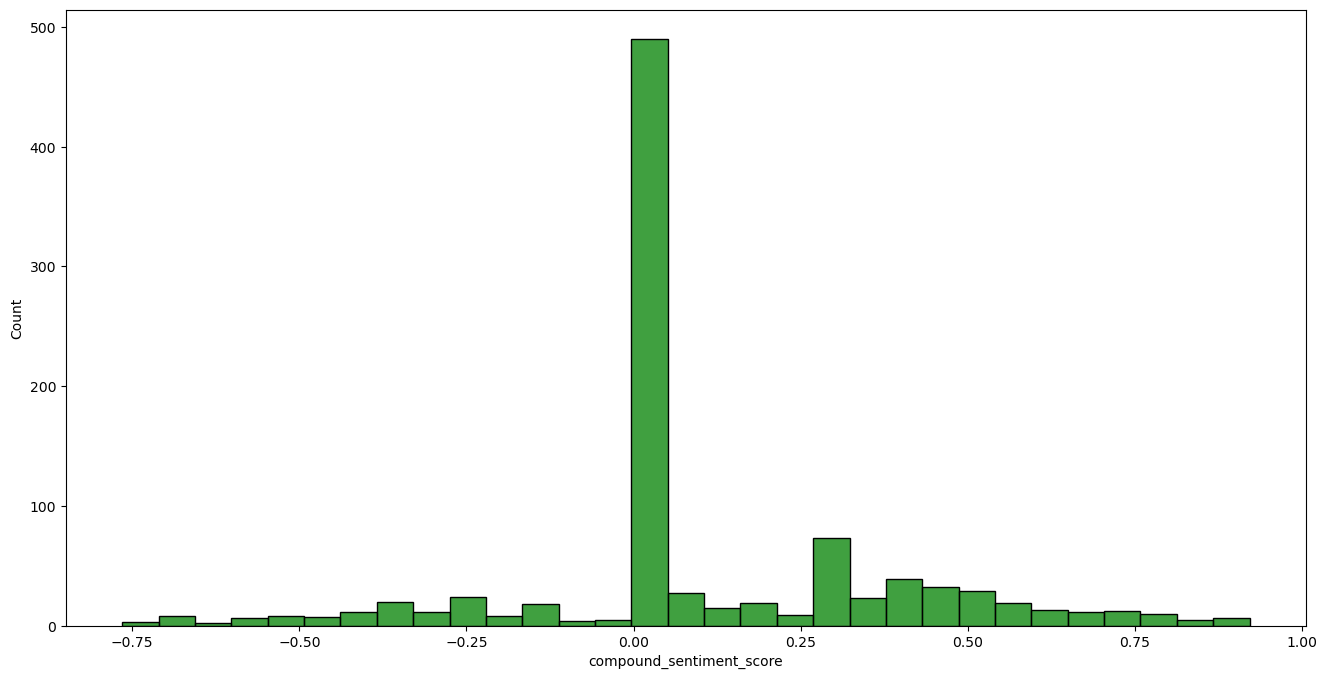

In [68]:
plt.figure(figsize=(16,8))
sns.histplot(result["compound_sentiment_score"], color='g')
plt.savefig("Distribution.jpg", dpi=1000, bbox_inches='tight')

## Word Cloud of Sentiments

In [70]:
positive_tweets = result[result['compound_sentiment_score']>0.05]['text']
negative_tweets = result[result['compound_sentiment_score']<-0.05]['text']
neutral_tweets = result[(result['compound_sentiment_score'] > -0.05) & (result['compound_sentiment_score'] < 0.05)]['text']


In [71]:
positive_tweets.head()

4          boeing contract machinists details agreement
9     boeing company boeing logs record number deliv...
10    kiss portfolio 4th quarter update year end rev...
11    boeing company boeing fellow honored sae inter...
12    spicejet orders 40 boeing jets worth 4 bln sou...
Name: text, dtype: object

In [72]:
neutral_tweets.head()

0                                            arrom amp
1              jan 3 premarket briefing 10 things know
2            boeing workers approve contract tied 777x
3    boeing machinists approve contract tied 777x 5...
5           boeing company ap us newsbrief 9 04 pm est
Name: text, dtype: object

In [73]:
negative_tweets.head()

14      boeing company nyse strikes deal indian company
19       boeing company boeing airbus battle leadership
22            aerospace etf showdown good hard go wrong
37    hot stocks renren inc renn baidu inc bidu the9...
40    15 30yr core beat 31 cents guided lower 2014 c...
Name: text, dtype: object

In [74]:
negative_tweets.iloc[19]

'mechanical problems boeing 787'

In [75]:
pos_WCloud = WordCloud(width=1200, height=800, background_color='white').generate(''.join(positive_tweets))

neg_WCloud = WordCloud(width=1200, height=800, background_color='white').generate(''.join(negative_tweets))

neutr_WCloud = WordCloud(width=1200,height=800, background_color='white').generate(''.join(neutral_tweets))

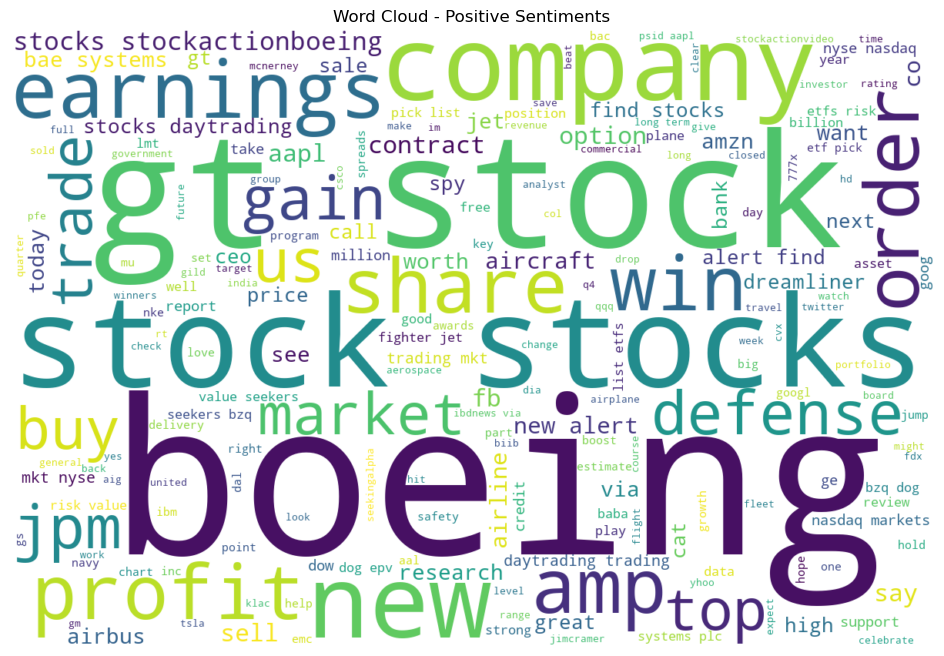

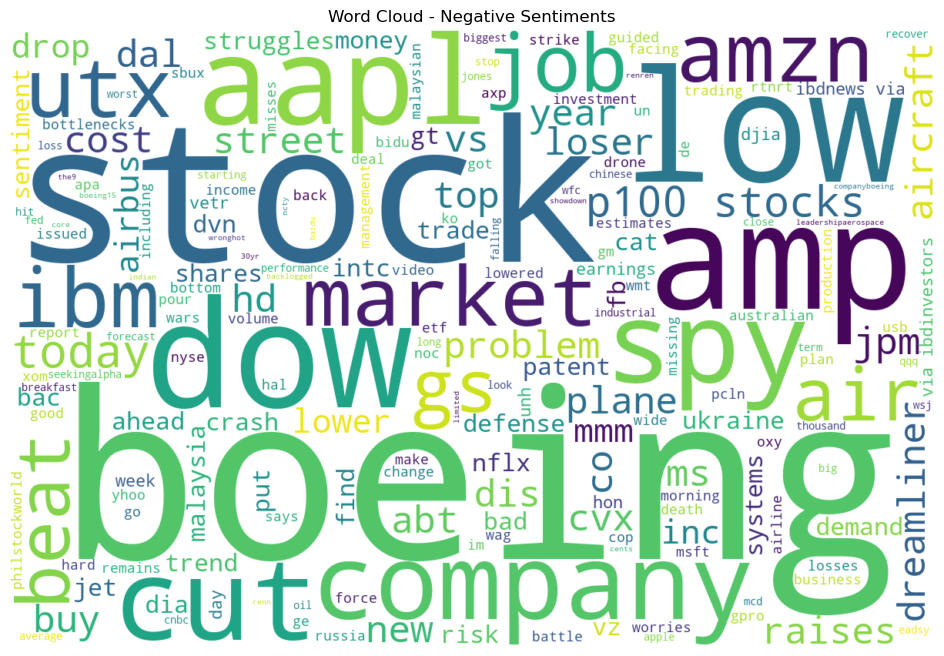

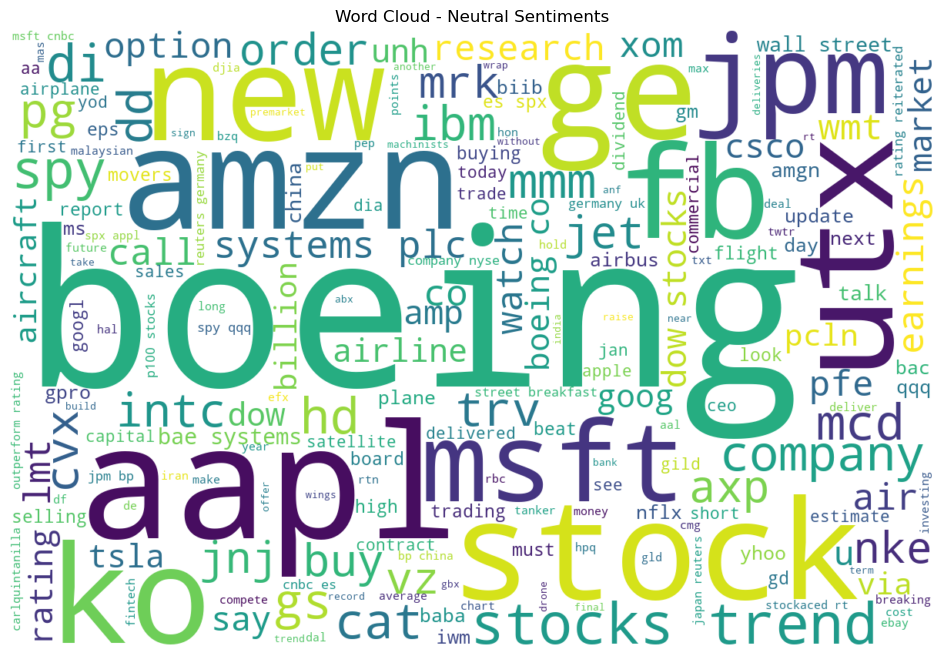

In [78]:
# Plot the WordClouds
plt.figure(figsize=(16,8))

plt.imshow(pos_WCloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiments')
plt.axis('off')
plt.savefig("PositiveSentiment.jpg", dpi=1000, bbox_inches='tight')


plt.figure(figsize=(16,8))
plt.imshow(neg_WCloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiments')
plt.axis('off')
plt.savefig("NegativeSentiment.jpg", dpi=1000, bbox_inches='tight')

plt.figure(figsize=(16,8))
plt.imshow(neutr_WCloud, interpolation='bilinear')
plt.title('Word Cloud - Neutral Sentiments')
plt.axis('off')
plt.savefig("NeutralSentiment.jpg", dpi=1000, bbox_inches='tight')

plt.show()

## Temporal Sentiment Analyis

C:\Users\mraer\AppData\Local\Temp\ipykernel_27376\979072324.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  result['year_month'] = result['created_at'].dt.to_period('M')


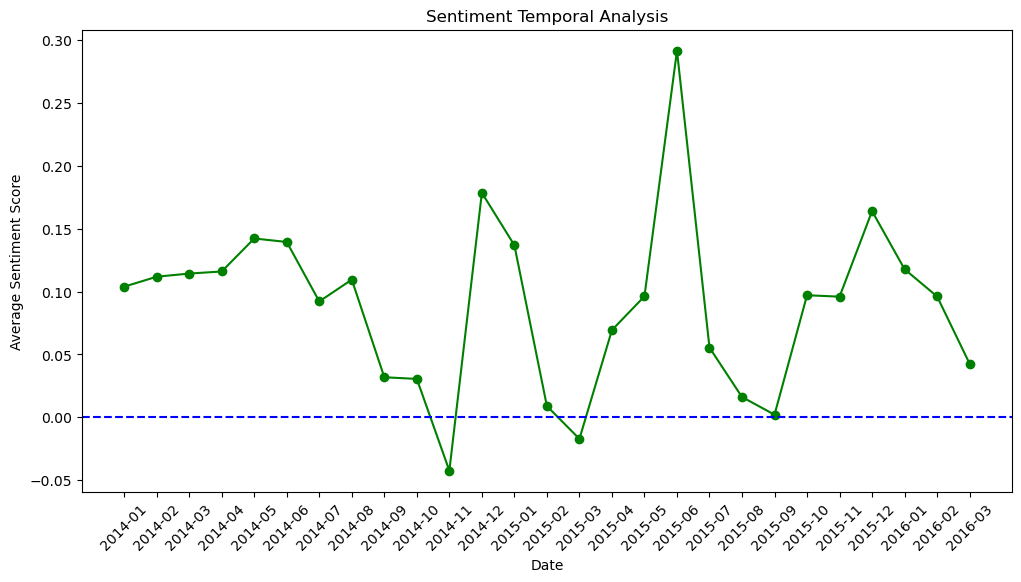

In [77]:
result['created_at'] = pd.to_datetime(result['created_at'])  # Convert 'created_at' to DateTime

result['year_month'] = result['created_at'].dt.to_period('M')
# Group by day and calculate average sentiment for each day
monthly_sentiment = result.groupby('year_month')['compound_sentiment_score'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment.index.astype(str), monthly_sentiment, marker='o', linestyle='-', color='g')
plt.axhline(y=0, color='b', linestyle='--')
plt.title('Sentiment Temporal Analysis')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45) 
plt.grid(False)
plt.savefig("TemporalSA.jpg", dpi=1000)
plt.show()


## Most Varied Tweet

In [53]:
max_Pos_sentiment = result['compound_sentiment_score'].idxmax()

max_Neg_sentiment = result['compound_sentiment_score'].idxmin()

print("The most positive tweet:\n",result.loc[max_Pos_sentiment, 'text'], '\n')


print("The most negative tweet:\n",result.loc[max_Neg_sentiment, 'text'], '\n')

The most positive tweet:
 1175 market look like hold onto gains love great potential market needs settle 

The most negative tweet:
 french a320 crash likely doubled lufthansa historic death toll 



<h2> Named Entity Recognition <h2>

<h3> In order to produce the entities, we are going to use English pipeline from spacy library, since it is a really convinient tool. <h3>

In [79]:
data_ner = data.copy()
data_ner = data_ner[data_ner["lang"] == "en"]
data_ner = clean_data(data_ner,'BA')

In [80]:
model = spacy.load("en_core_web_sm")
def extract_entities(text, model):
    doc = model(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [81]:
data_ner["entities"] = [extract_entities(text, model=model) for text in data_ner["text"]]

In [82]:
entity_counts = Counter([entity for sublist in data_ner["entities"] for _, entity in sublist])

Based on the sorted DataFrame, which lists various types of entities identified in a text corpus (presumably from tweets) along with their frequency of occurrence, the following interpretations can be drawn:

### Most Common Entities
- The **most common type** of entity identified is `CARDINAL`, with **10,246 occurrences**. Cardinal numbers are numerals that denote quantity.
- The **second most common** is `PERSON`, with **10,171 occurrences**, indicating names of people.
- The **third** is `ORG` (organizations) with **6,632 occurrences**, followed by `DATE` (dates) with **6,063 occurrences**.
- `GPE` (geopolitical entities like countries, cities) also appears frequently, with **1,356 mentions**.

### Least Common Entities
- The **least common entity** is `LANGUAGE`, with only **6 occurrences**, indicating mentions of languages.
- `EVENT` (named events) and `PERCENT` (percentages) are also among the least common, with **11 and 30 occurrences** respectively.
- `WORK_OF_ART` (titles of books, songs, etc.) and `FAC` (facilities) are also relatively rare in the dataset, with **35 and 48 mentions**.


C:\Users\mraer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mraer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mraer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


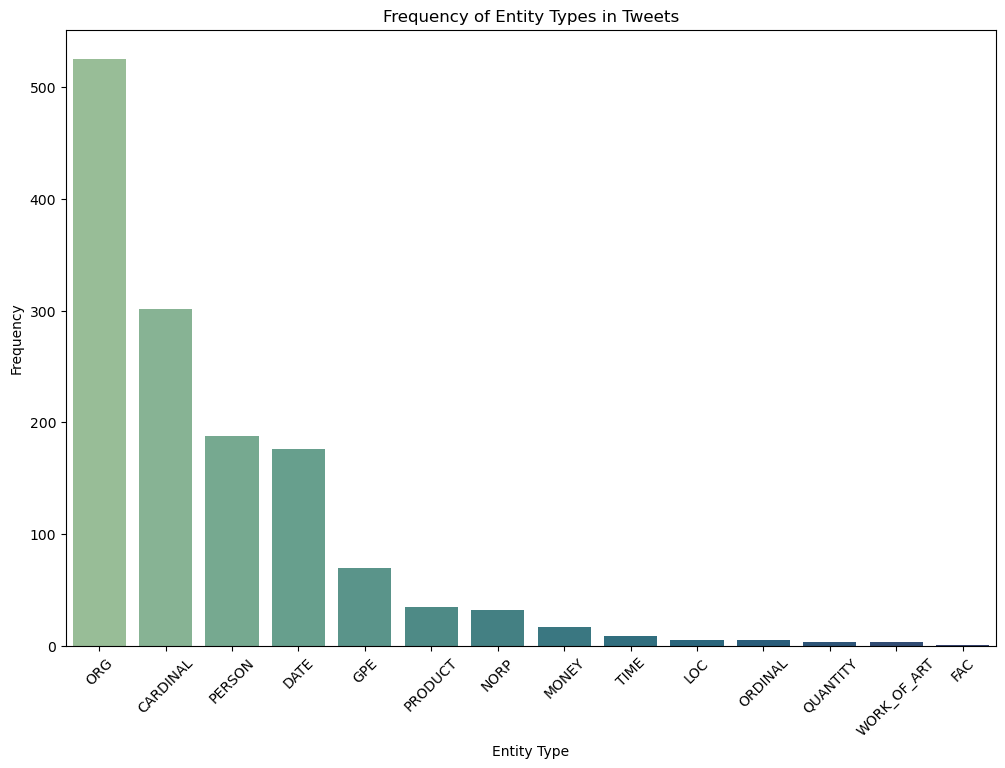

In [91]:
entity_df = pd.DataFrame(entity_counts.items(), columns=["Entity Type", "Frequency"])
sorted_entity_df = entity_df.sort_values(by='Frequency', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Entity Type', y='Frequency', data=sorted_entity_df, palette="crest")
plt.xticks(rotation=45)
plt.title('Frequency of Entity Types in Tweets')
plt.savefig("Entity_type.jpg", dpi=500, bbox_inches = 'tight')
plt.show()

<h3> Heatmap of Entity Co-occurences <h3

In [84]:
data_ner["entity_types"] = data_ner["entities"].apply(
    lambda x: [ent[1] for ent in x] if isinstance(x, list) else list(set(ent[1] for ent in x))
)
all_entities = set(entity for sublist in data_ner["entity_types"] for entity in sublist)
entity_to_index = {entity: i for i, entity in enumerate(all_entities)}
co_occurrence_matrix = np.zeros((len(all_entities), len(all_entities)))

for entities in data_ner["entity_types"]:
    for entity1, entity2 in combinations(entities, 2):
        index1 = entity_to_index[entity1]
        index2 = entity_to_index[entity2]
        co_occurrence_matrix[index1][index2] += 1
        co_occurrence_matrix[index2][index1] += 1

all_entities_list = list(all_entities)
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=all_entities_list, columns=all_entities_list)

The heatmap provided represents the co-occurrence of named entities across a collection of documents or texts. Each cell reflects the frequency with which two types of entities are mentioned together. Below are key observations from the heatmap:

- The **diagonal cells** show the highest counts, indicating the frequency of the same type of entity co-occurring with itself. For example, the `CARDINAL` entities have the highest co-occurrence count, particularly with other `CARDINAL` entities (7846 occurrences).
- **High co-occurrence** is observed between `PERSON` and `ORG` entities, as denoted by the bright cells off the diagonal. This suggests that people and organizations are often mentioned together in the dataset.
- `GPE` entities co-occur significantly with `CARDINAL` entities, hinting at frequent mentions of geographical locations alongside numerical data, such as statistics or measurements.
- Darker cells represent **lower frequencies** of co-occurrence, such as those between `EVENT` and `WORK_OF_ART` entities, indicating these types of entities are less commonly discussed or occur in more specialized contexts.

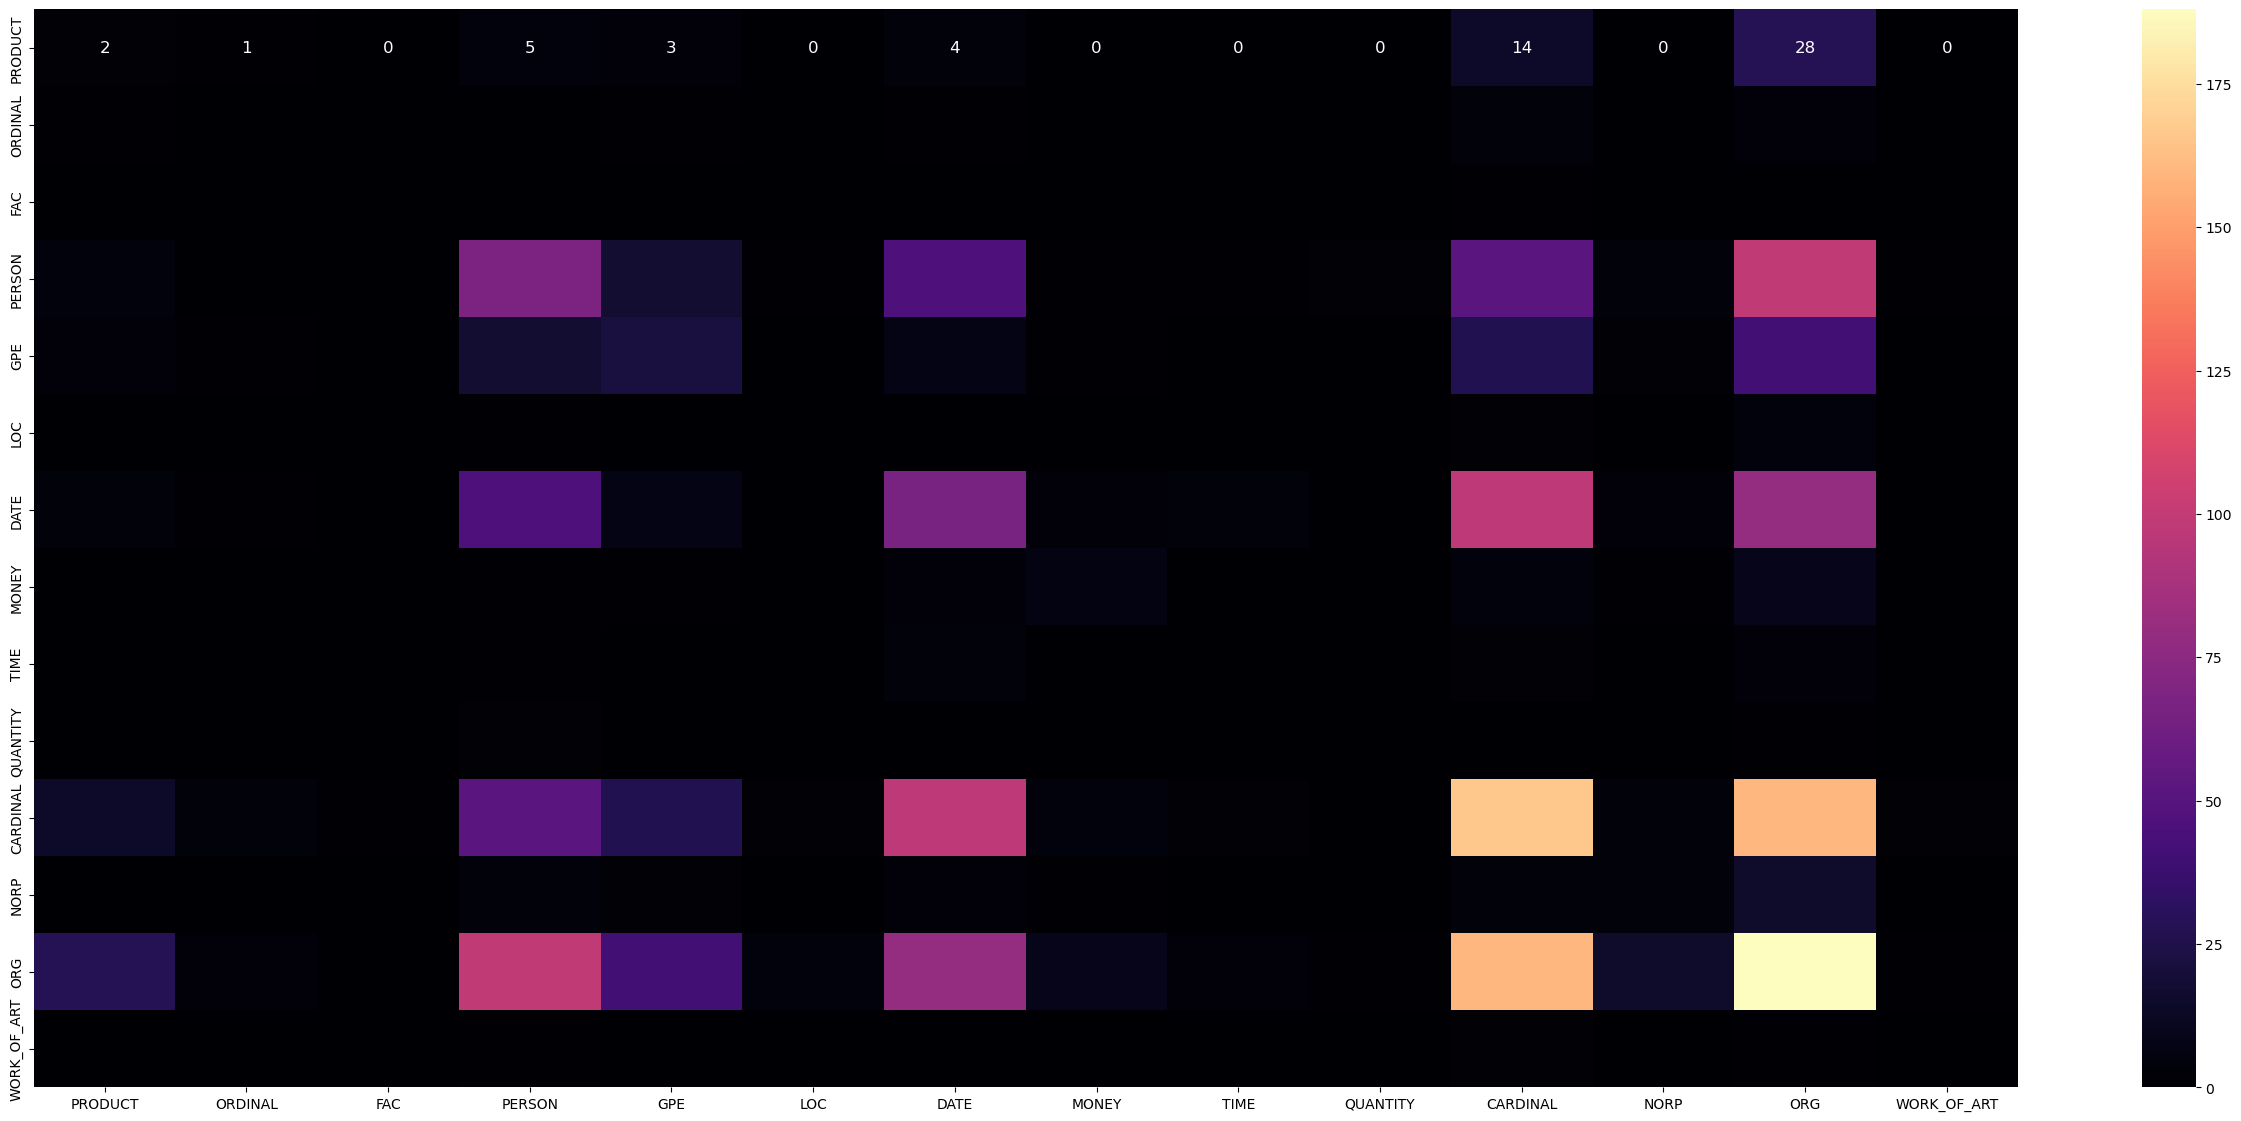

In [92]:
plt.figure(figsize=(32, 14))
sns.heatmap(co_occurrence_df, annot=True, cmap="magma", annot_kws={"size": 12}, fmt=".0f")
plt.savefig("heatmap.jpg", dpi=500, bbox_inches='tight')
plt.show()

<h3> Word Cloud <h3>

In [86]:
all_text = " ".join(text for text in data_ner["text"])
stop_words = set(stopwords.words("english"))
specific_words_to_remove = {"https", "aapl", "tco", "appple", "app le"}
stop_words.update(specific_words_to_remove)
all_text = " ".join(word for word in all_text.split() if word.lower() not in stop_words)
all_text = re.sub(r"[^A-Za-z ]+", "", all_text)

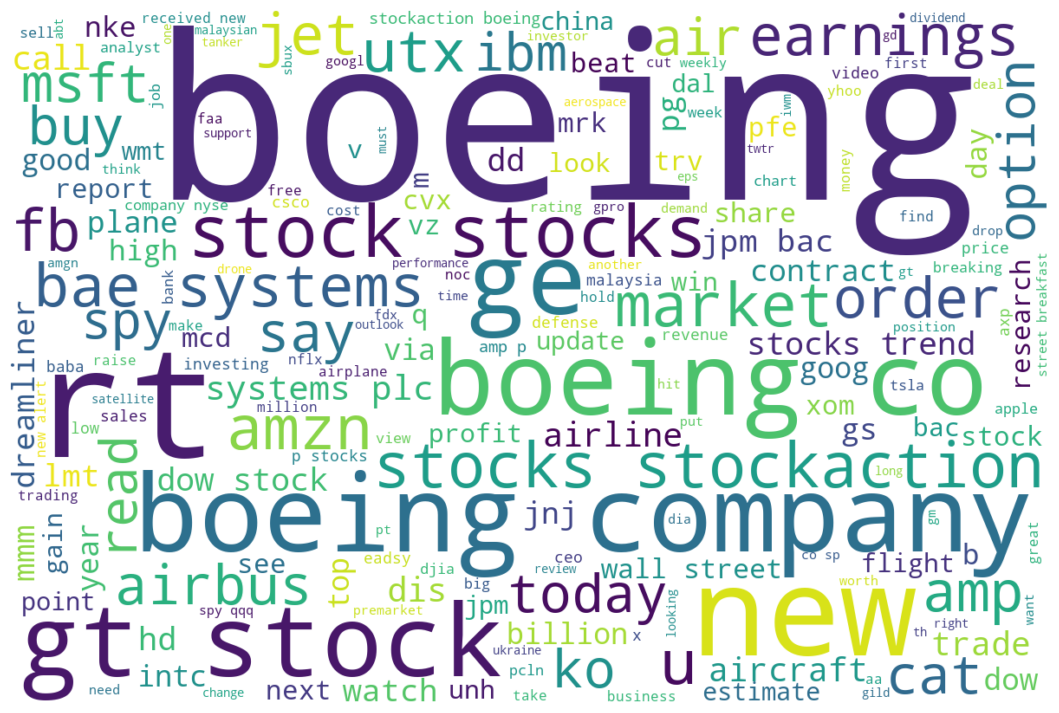

In [90]:
wordcloud = WordCloud(width=1200, height=800, background_color="white").generate(all_text)
plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("NER WordCloud.jpg", dpi=500, bbox_inches = 'tight')
plt.show()

<h3> Displaying visualizations of individual tweets <h3>

In [63]:
sample = data_ner.iloc[305]["text"]
doc = model(sample)
spacy.displacy.serve(doc, style="ent")

C:\Users\mraer\anaconda3\Lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [32]:
sample = data_ner.iloc[152]["text"]
doc = model(sample)
spacy.displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [33]:
sample = data_ner.iloc[505]["text"]
doc = model(sample)
spacy.displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
